In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import pandas as pd
from scipy import interpolate
from scipy.interpolate import RectBivariateSpline
from scipy import integrate
from math import pi as PI
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.legend_handler import HandlerLine2D
from matplotlib.ticker import MultipleLocator


#from matplotlib import rc
#rc('font',**{'family':'serif','serif':['Computer Modern']})
#rc('text', usetex=True)

#---------------- PLOT STYLE --------------------------#
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Computer Modern']
rcParams['font.monospace'] = ['Typewriter']
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = [
                                    r'\usepackage{amsmath}',
                                    r'\usepackage{amssymb}']
rcParams['axes.spines.top'] = True
rcParams['axes.spines.bottom'] = True
rcParams['axes.spines.left'] = True
rcParams['axes.spines.right'] = True
rcParams['axes.labelsize'] = 27
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['ytick.labelsize'] = 23
rcParams['xtick.labelsize'] = 23
rcParams['xtick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.major.size'] = 10
rcParams['ytick.minor.size'] = 5
rcParams['xtick.major.pad'] = 10
rcParams['legend.fontsize'] = 20
rcParams['legend.frameon'] = False
rcParams['figure.titlesize'] = 27
rcParams['axes.titlesize'] = 27
rcParams['axes.unicode_minus'] = True
#print(rcParams.keys() )
#------------------------------------------#
import os
import chi2_pro as chi2_pro
main_dir = os.path.dirname(os.getcwd())

chi2_pro.py called!
function to call: grid_val(ptx,pty,ptz)
use return as: 
X_val=grid_val(X_pts,Y_pts,Z_pts)[0]
Y_val=grid_val(X_pts,Y_pts,Z_pts)[1]
Z_val=grid_val(X_pts,Y_pts,Z_pts)[2]


<ipython-input-1-a1678968ce7e>:27: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  rcParams['text.latex.preamble'] = [


## 1. Neutralino Flux Dmeson vs Kaon

In [5]:
# Colors
cmap = plt.get_cmap("tab10")

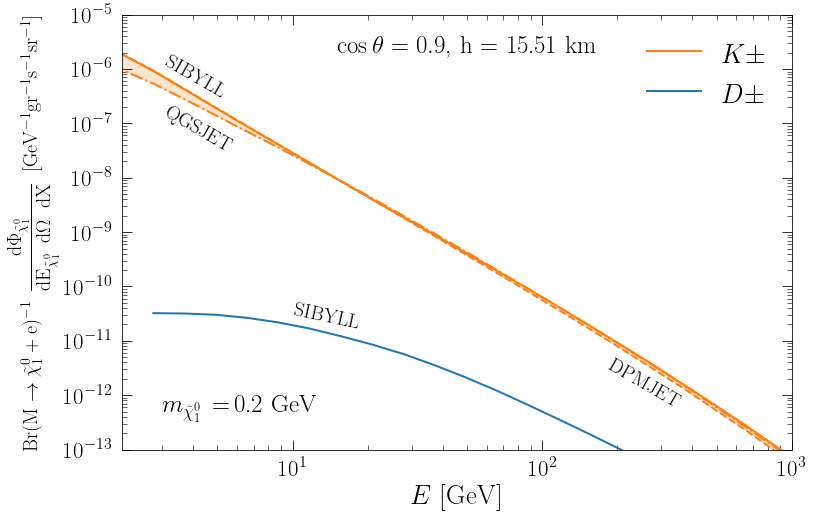

In [13]:
# Read D-meson CSV
df_D=pd.read_csv(main_dir + '/datafiles/NeutralinoFlux/NeutralinoFlux_BM1_AUX_SYBILL.csv', index_col = 0 )
# Read Ks CSV
df_K=pd.read_csv(main_dir + '/datafiles/NeutralinoFlux/NeutralinoFlux_BM3_SYBILL.csv', index_col = 0 )
df_K= df_K[ df_K.E >= 1.5]
df_K_2=pd.read_csv(main_dir + '/datafiles/NeutralinoFlux/NeutralinoFlux_BM3_DPMJET.csv', index_col = 0 )
df_K_2= df_K_2[ df_K_2.E >= 1.5]
df_K_4=pd.read_csv(main_dir + '/datafiles/NeutralinoFlux/NeutralinoFlux_BM3_QGSJET.csv', index_col = 0 )
df_K_4= df_K_4[ df_K_4.E >= 1.5]


#---------------------------------#
df_D['m_round'] = df_D["m"].round(3)

df_K['m_round'] = df_K['m'].round(3)
df_K_2['m_round'] = df_K_2['m'].round(3)
df_K_4['m_round'] = df_K_4['m'].round(3)

m_t= df_D['m_round'].unique()[0]
m_t2 = df_K['m_round'].unique()[3]
cos_t= 0.9
h_t = df_D['H'].unique()[-10]

#--------------------------------#
df_D_tmp=df_D[(df_D['cosine'] == cos_t) & (df_D['m_round'] == m_t) & (df_D['H']==h_t)]

df_K_tmp=df_K[(df_K['cosine'] == cos_t) & (df_K['m_round'] == m_t2) & (df_K['H']==h_t)]
df_K_tmp_2=df_K_2[(df_K_2['cosine'] == cos_t) & (df_K_2['m_round'] == m_t2) & (df_K_2['H']==h_t)]
df_K_tmp_4=df_K_4[(df_K_4['cosine'] == cos_t) & (df_K_4['m_round'] == m_t2) & (df_K_4['H']==h_t)]


#---------------------------------#
#Br_K = 0.41536526595001994 #from Pheno.py
#Br_D = 0.0006408669940140821 #from Pheno.py

#---------------------------------#
#PLOT
fig,ax=plt.subplots(figsize=(12,8))


# Ks
ax.plot(df_K_tmp['E'],df_K_tmp['flux'], linestyle='solid', linewidth=2.0, alpha=1.0, color = cmap(1), label = r'$K\pm$')
ax.plot(df_K_tmp_2['E'],df_K_tmp_2['flux'], linestyle='dashed', linewidth=2.0, alpha=1.0, color = cmap(1))#, label = r'$K\pm$ DPMJET')
#ax.plot(df_K_tmp_3['E'],df_K_tmp_3['flux'], linestyle='solid', linewidth=2.0, alpha=1.0, color = cmap(1))#, label = r'$K\pm$ EPOS-LHC')
ax.plot(df_K_tmp_4['E'],df_K_tmp_4['flux'], linestyle='-.', linewidth=2.0, alpha=1.0, color = cmap(1))#, label = r'$K\pm$ QGSJET')

ax.fill_between(df_K_tmp['E'], df_K_tmp['flux'], df_K_tmp_2['flux'], alpha = 0.2, color = cmap(1))
ax.fill_between(df_K_tmp['E'], df_K_tmp['flux'], df_K_tmp_4['flux'], alpha = 0.2, color = cmap(1))


#Ds
ax.plot(df_D_tmp['E'],df_D_tmp['flux'], linewidth=2.0, alpha=1.0, color = cmap(0), label = r'$D\pm$')
#ax.plot(df_D_tmp_2['E'],df_D_tmp_2['flux'], linewidth=1.0, alpha=1.0, linestyle='dashed', color = cmap(0))#, label = r'$D\pm$ DPMJET')
#ax.fill_between(df_D_tmp['E'], df_D_tmp['flux'], df_D_tmp_2['flux'], alpha = 0.2)


#---------------------------------#
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlim([df_K.E.unique()[1], 1e3])
ax.set_ylim([1e-13, 1e-5])

#---------------------------------#
#ticks

ax.set_ylabel(r'$\mathrm{ Br( M \rightarrow \tilde{\chi}^0_1 + e )^{-1} \:\: \dfrac{d\Phi_{\tilde{\chi}^0_1}}{dE_{\tilde{\chi}^0_1}\;\; d\Omega\;\;dX} \;\; [GeV^{-1} gr^{-1} s^{-1} sr^{-1}] }$', fontdict={'size': 20})
ax.set_xlabel(r'$ E$'+' [GeV]', fontdict={'size': 27})

locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * 1, numticks=100)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * 1, numticks=100)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.tick_params(axis='both', which='major', right=True, top=True, labelsize = 23, direction = 'in', length = 10, pad = 10)
ax.tick_params(axis='both', which='minor', right=True, top=True, labelsize = 23, direction = 'in', length = 5)

#-----------------------------------#
#legend
ax.legend(fontsize=20, frameon=False)

#-----------------------------------#
plt.annotate(r'\hspace{3mm}$\cos\theta = 0.9$,\hspace{3mm}'+f'h = {round(h_t,3)} km', xy=(1.5*1e1,2e-6), size=25)
plt.annotate(r'$m_{\tilde{\chi}^0_1}\,=\,$'+str(m_t)+' GeV', xy=(3*1e0,5e-13), size=25)
6
#Ds
#plt.annotate('DPMJET', xy=(2e1,9e-14), size=20, rotation=-10)
plt.annotate('SIBYLL', xy=(1.0e1,1.7e-11), size=20, rotation=-12)#, color = cmap(0))

#Ks
plt.annotate('{SIBYLL}', xy=(3e0,3e-7), size=20, rotation=-30)#, color = cmap(1))
plt.annotate('{QGSJET}', xy=(3e0,3e-8), size=20, rotation=-30)#, color = cmap(1))
plt.annotate('{DPMJET}', xy=(1.8e2, 6e-13), size=20, rotation=-30)#, color = cmap(1))

ax.legend(fontsize=27)
plt.savefig(main_dir+'/plots/NeutralinoFlux.pdf',  bbox_inches="tight")
plt.show()

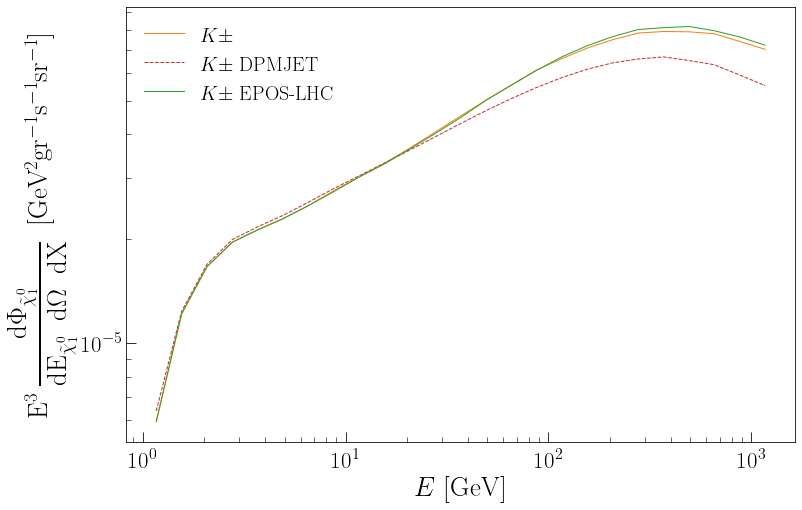

In [9]:
# Read D-meson CSV
df_D=pd.read_csv(main_dir + '/datafiles/NeutralinoFlux/NeutralinoFlux_BM1_AUX_SYBILL.csv', index_col = 0 )
df_D_2=pd.read_csv(main_dir + '/datafiles/NeutralinoFlux/NeutralinoFlux_BM1_AUX_DPMJET.csv', index_col = 0 )

df_K=pd.read_csv(main_dir + '/datafiles/NeutralinoFlux/NeutralinoFlux_BM3_SYBILL.csv', index_col = 0 )
df_K_2=pd.read_csv(main_dir + '/datafiles/NeutralinoFlux/NeutralinoFlux_BM3_DPMJET.csv', index_col = 0 )
df_K_3=pd.read_csv(main_dir + '/datafiles/NeutralinoFlux/NeutralinoFlux_BM3_EPOS-LHC.csv', index_col = 0 )


#---------------------------------#
df_D['m_round'] = df_D["m"].round(3)
df_D_2['m_round'] = df_D_2["m"].round(3)

df_K['m_round'] = df_K['m'].round(3)
df_K_2['m_round'] = df_K_2['m'].round(3)
df_K_3['m_round'] = df_K_3['m'].round(3)

m_t= df_D['m_round'].unique()[0]
m_t2 = df_K['m_round'].unique()[3]
cos_t= 0.9
h_t = df_D['H'].unique()[-10]

#--------------------------------#
df_D_tmp=df_D[(df_D['cosine'] == cos_t) & (df_D['m_round'] == m_t) & (df_D['H']==h_t)]
df_D_tmp_2=df_D_2[(df_D_2['cosine'] == cos_t) & (df_D_2['m_round'] == m_t) & (df_D_2['H']==h_t)]

df_K_tmp=df_K[(df_K['cosine'] == cos_t) & (df_K['m_round'] == m_t2) & (df_K['H']==h_t)]
df_K_tmp_2=df_K_2[(df_K_2['cosine'] == cos_t) & (df_K_2['m_round'] == m_t2) & (df_K_2['H']==h_t)]
df_K_tmp_3=df_K_3[(df_K_3['cosine'] == cos_t) & (df_K_3['m_round'] == m_t2) & (df_K_3['H']==h_t)]

#---------------------------------#
#PLOT
fig,ax=plt.subplots(figsize=(12,8))

# Ks
ax.plot(df_K_tmp['E'],df_K_tmp['flux']*df_K_tmp['E']**3, linestyle='solid', linewidth=1.0, alpha=1.0, color = cmap(1), label = r'$K\pm$')
ax.plot(df_K_tmp_2['E'],df_K_tmp_2['flux']*df_K_tmp['E']**3, linestyle='dashed', linewidth=1.0, alpha=1.0, color = cmap(3), label = r'$K\pm$ DPMJET')
ax.plot(df_K_tmp_3['E'],df_K_tmp_3['flux']*df_K_tmp['E']**3, linestyle='solid', linewidth=1.0, alpha=1.0, color = cmap(2), label = r'$K\pm$ EPOS-LHC')


#ax.fill_between(df_K_tmp['E'], df_K_tmp['flux'], df_K_tmp_2['flux'], alpha = 0.2, color = cmap(1))


#---------------------------------#
ax.set_yscale('log')
ax.set_xscale('log')

#ax.set_xlim([1e1, 1e3])
#ax.set_ylim([1e-16, 1e-9])

#---------------------------------#
#ticks

ax.set_ylabel(r'$\mathrm{ E^3 \: \dfrac{d\Phi_{\tilde{\chi}^0_1}}{dE_{\tilde{\chi}^0_1}\;\; d\Omega\;\;dX} \;\; [GeV^{2} gr^{-1} s^{-1} sr^{-1}] }$', fontdict={'size': 27})
ax.set_xlabel(r'$ E$'+' [GeV]', fontdict={'size': 27})

locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * 1, numticks=100)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * 1, numticks=100)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

#ax.tick_params(axis='both', which='major', right=True, top=True, labelsize = 23, direction = 'in', length = 10, pad = 10)
#ax.tick_params(axis='both', which='minor', right=True, top=True, labelsize = 23, direction = 'in', length = 5)

#-----------------------------------#
#legend
ax.legend(fontsize=20, frameon=False)

#-----------------------------------#

ax.legend(fontsize=20, frameon=False)
plt.savefig(main_dir+'/plots/NeutralinoFlux.pdf',  bbox_inches="tight")
plt.show()

## 2. Super-Kamiokande SGN+BKG 

In [34]:
#------------------------------- READ SK DATA INTO PANDAS DF ---------------------------------------------#
## MULTIRING nue/nuebar
df_multiring_nue = pd.read_csv(main_dir+'\datafiles\SK_data\multiring_multigev_nue.csv',names=['cos','nev'] )
df_multiring_nue_pred = pd.read_csv(main_dir+'\datafiles\SK_data\multiring_multigev_nue_prediction.csv',names=['cos','nev'] )
df_multiring_nue['difference'] = ( df_multiring_nue.nev - df_multiring_nue_pred.nev)/ df_multiring_nue_pred.nev

df_multiring_nuebar = pd.read_csv(main_dir+'\datafiles\SK_data\multiring_multigev_nuebar.csv',names=['cos','nev'] )
df_multiring_nuebar_pred = pd.read_csv(main_dir+'\datafiles\SK_data\multiring_multigev_nuebar_prediction.csv',names=['cos','nev'] )
df_multiring_nuebar['difference'] = ( df_multiring_nuebar.nev - df_multiring_nuebar_pred.nev)/ df_multiring_nuebar_pred.nev

## SINGLERING nue/nuebar
df_singlering_nue = pd.read_csv(main_dir+'\datafiles\SK_data\singlering_multigev_nue.csv',names=['cos','nev'] )
df_singlering_nue_pred = pd.read_csv(main_dir+'\datafiles\SK_data\singlering_multigev_nue_prediction.csv',names=['cos','nev'] )
df_singlering_nue['difference'] = ( df_singlering_nue.nev - df_singlering_nue_pred.nev)/ df_singlering_nue_pred.nev

df_singlering_nuebar = pd.read_csv(main_dir+'\datafiles\SK_data\singlering_multigev_nuebar.csv',names=['cos','nev'] )
df_singlering_nuebar_pred = pd.read_csv(main_dir+'\datafiles\SK_data\singlering_multigev_nuebar_prediction.csv',names=['cos','nev'] )
df_singlering_nuebar['difference'] = ( df_singlering_nuebar.nev - df_singlering_nuebar_pred.nev)/ df_singlering_nuebar_pred.nev


#--------------------- Preparing Data for plots -----------------------------#
list_titles = ['Multi-Ring e-like $\\nu_e$','Multi-Ring e-like $\\bar{\\nu}_e$', 'Multi-GeV e-like $\\nu_e$','Multi-GeV e-like $\\bar{\\nu}_e$']
list_data = [df_multiring_nue, df_multiring_nuebar, df_singlering_nue, df_singlering_nuebar]
list_pred = [df_multiring_nue_pred, df_multiring_nuebar_pred, df_singlering_nue_pred, df_singlering_nuebar_pred]

0.51 0.3665241237079628


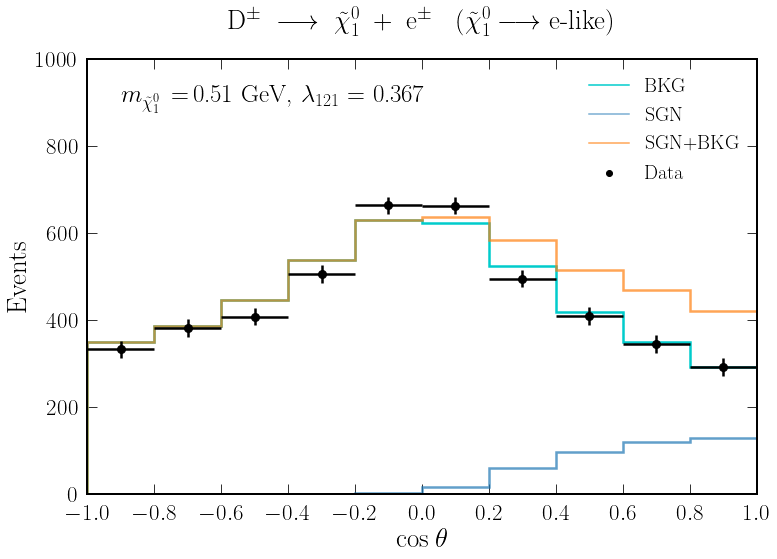

In [42]:
#------------------------------- READ SIGNAL NEVENTS INTO PANDAS DF ---------------------------------------------#
df_sgn = pd.read_csv(main_dir +'/datafiles/EventDistribution/NEVENTS_BM1_SYBILL.csv', index_col=0)
df_sgn = df_sgn.reset_index(drop=True)

bins = [round(i,2) for i in np.arange(-1,1.2,0.2)]
bin_center = [bin_ + 0.1 for bin_ in bins]


df_merged_pred = pd.concat( list_pred ).reset_index()
df_merged_pred['bin'] = pd.cut(df_merged_pred.cos, bins=bins,  include_lowest=True)    
pred_per_bin = df_merged_pred.groupby('bin').nev.sum().values

df_merged_data = pd.concat( list_data ).reset_index()
df_merged_data['bin'] = pd.cut(df_merged_data.cos, bins=bins,  include_lowest=True)    
data_per_bin = df_merged_data.groupby('bin').nev.sum().values
difference = ( data_per_bin -pred_per_bin)/ pred_per_bin
#--------------------------------------------------PLOT-----------------------------------------------#
fig, ax =  plt.subplots( figsize=(12,8) )
         
# DATA + MC BKG
errory=20.0
errorx=0.1
ax.hist(df_merged_pred.cos, bins=bins[:], weights=df_merged_pred.nev, histtype='step', color='#00cccc', linewidth=2.5)
ax.scatter(bin_center[:-1], data_per_bin,color='k', label='Data')
ax.errorbar(bin_center[:-1],data_per_bin, errory, errorx, "o", markersize=8, color = "k", linewidth=2.5, zorder=3)
#------------------------------------------#
# NEUTRALINO SGN

ma_val = df_sgn.m.unique()[1]
lambda_val = df_sgn['lam121'].unique()[11]
print(ma_val, lambda_val)
df_sgn_filter = df_sgn[ (df_sgn['lam121'] == lambda_val) & (df_sgn['m']==ma_val)]
df_sgn_filter_events = df_sgn_filter.nev
ax.hist(df_sgn_filter.cos, bins=bins[:], weights= df_sgn_filter_events, histtype='step', color = cmap(0), alpha = 0.7, linewidth=2.5)

# SGN+BKG
bkg = df_merged_pred.groupby('bin').nev.sum().values
sgn_bkg = df_sgn_filter.nev.values + bkg
ax.hist(df_sgn_filter.cos, bins=bins[:], weights= sgn_bkg, histtype='step', color = cmap(1), alpha = 0.7, linewidth=2.5)

#------------------------------------------#
ax.set_xlabel(r'cos$\:\theta$', fontsize = 27)
ax.set_ylabel(r'Events', fontsize = 27)

ax.set_xlim(-1,1)
ax.set_ylim(0,1000)
ax.set_xticks(bins)
ax.tick_params(axis='both', which='major', right=True, top=True, labelsize = 23, direction = 'in', length = 10, pad = 10)

ax.spines['bottom'].set_color('0')
ax.spines["bottom"].set_linewidth(2)
ax.spines['top'].set_color('0')
ax.spines["top"].set_linewidth(2)
ax.spines['right'].set_color('0')
ax.spines["right"].set_linewidth(2)
ax.spines['left'].set_color('0')
ax.spines["left"].set_linewidth(2)

#------------------------------------------#
plt.annotate(r'$m_{\tilde{\chi}^0_1}\,=\,$'+str(ma_val)+' GeV,' + r'\hspace{3mm}$\lambda_{121} = $'+f' {round(lambda_val,3)}', xy=(-0.9,900), size=25)

#------------------------------------------#
x_aux = y_aux = [0]
ax.plot(x_aux, y_aux, color='#00cccc', label = 'BKG')
ax.plot(x_aux, y_aux, color = cmap(0), alpha = 0.6, label = 'SGN')
ax.plot(x_aux, y_aux, color = cmap(1), alpha = 0.7, label = 'SGN+BKG')
ax.legend(fontsize=20, frameon=False)

ax.set_title(r'$\mathrm{ D^{\pm} \; \longrightarrow \; \tilde{\chi}^0_1 \;+\; e^{\pm}} \;\;\; ( \tilde{\chi}^0_1 \longrightarrow$ e-like)', fontsize = 27, pad=30)

#------------------------------------------#
plt.savefig(main_dir+'/plots/NeutralinoEvents_D.pdf',  bbox_inches="tight")
plt.show()

0.31 0.0020691380811147


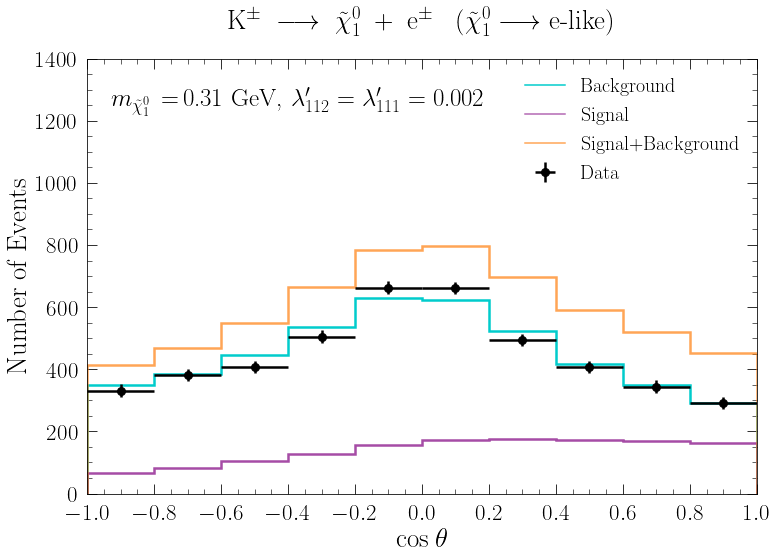

In [44]:
#------------------------------- READ SIGNAL NEVENTS INTO PANDAS DF ---------------------------------------------#
df_sgn = pd.read_csv(main_dir +'/datafiles/EventDistribution/NEVENTS_BM3_SYBILL.csv', index_col=0)
#df_sgn = pd.read_csv(main_dir +'/notebooks/Events_LN_from_K_msf_1000_mass_coupling.csv')
df_sgn = df_sgn.reset_index(drop=True)
#print(df_sgn)
#print(df_sgn['lam112'].unique())
#print(df_sgn.m.unique())
bins = [round(i,2) for i in np.arange(-1,1.2,0.2)]
bin_center = [bin_ + 0.1 for bin_ in bins]


df_merged_pred = pd.concat( list_pred ).reset_index()
df_merged_pred['bin'] = pd.cut(df_merged_pred.cos, bins=bins,  include_lowest=True)    
pred_per_bin = df_merged_pred.groupby('bin').nev.sum().values

df_merged_data = pd.concat( list_data ).reset_index()
df_merged_data['bin'] = pd.cut(df_merged_data.cos, bins=bins,  include_lowest=True)    
data_per_bin = df_merged_data.groupby('bin').nev.sum().values
difference = ( data_per_bin -pred_per_bin)/ pred_per_bin
#--------------------------------------------------PLOT-----------------------------------------------#
fig, ax =  plt.subplots( figsize=(12,8) )
         
# DATA + MC BKG
errory=20.0
errorx=0.1
ax.hist(df_merged_pred.cos, bins=bins[:], weights=df_merged_pred.nev, histtype='step', color='#00cccc', linewidth=2.5)
ax.scatter(bin_center[:-1], data_per_bin,color='k')
ax.errorbar(bin_center[:-1],data_per_bin, errory, errorx, "o", markersize=8, color = "k", linewidth=2.5, zorder=3,  label = 'Data')
#------------------------------------------#
# NEUTRALINO SGN

ma_val = df_sgn.m.unique()[7]
lambda_val = df_sgn['lam112'].unique()[5]
print(ma_val, lambda_val)

df_sgn_filter = df_sgn[ (df_sgn['lam112'] == lambda_val) & (df_sgn['m']==ma_val)]
df_sgn_filter_events = df_sgn_filter.nev
ax.hist(df_sgn_filter.cos, bins=bins[:], weights= df_sgn_filter_events, histtype='step', color = 'purple', alpha = 0.7, linewidth=2.5)

# SGN+BKG
bkg = df_merged_pred.groupby('bin').nev.sum().values
sgn_bkg = df_sgn_filter.nev.values + bkg
ax.hist(df_sgn_filter.cos, bins=bins[:], weights= sgn_bkg, histtype='step', color = cmap(1), alpha = 0.7, linewidth=2.5)

#------------------------------------------#
ax.set_xlabel(r'cos$\:\theta$', fontsize = 27)
ax.set_ylabel(r'Number of Events', fontsize = 27)

ax.set_xlim(-1,1)
ax.set_ylim(0,1400)
ax.set_xticks(bins)


ax.tick_params(axis='both', which='major', right=True, top=True, labelsize = 23, direction = 'in', length = 10, pad = 10)
ax.tick_params(axis='both', which='minor', right=True, top=True, labelsize = 23, direction = 'in', length = 5, pad = 10)

ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_minor_locator(MultipleLocator(50))

#------------------------------------------#
plt.annotate(r'$m_{\tilde{\chi}^0_1}\,=\,$'+str(ma_val)+' GeV,' + r'\hspace{3mm}$\lambda^\prime_{112} = \lambda^\prime_{111} = $'+f' {round(lambda_val,3)}', xy=(-0.93,1250), size=25)

#------------------------------------------#
x_aux = y_aux = [0]
ax.plot(x_aux, y_aux, color='#00cccc', label = 'Background')
ax.plot(x_aux, y_aux, color = 'purple', alpha = 0.6, label = 'Signal')
ax.plot(x_aux, y_aux, color = cmap(1), alpha = 0.7, label = 'Signal+Background')
ax.legend(fontsize=20, frameon=False)

ax.set_title(r'$\mathrm{ K^{\pm} \; \longrightarrow \; \tilde{\chi}^0_1 \;+\; e^{\pm}} \;\;\; ( \tilde{\chi}^0_1 \longrightarrow$ e-like)', fontsize = 27, pad=30)

#------------------------------------------#
plt.savefig(main_dir+'/plots/NeutralinoEvents_K.pdf',  bbox_inches="tight")
plt.show()

## 3. Aeff vs CTAU

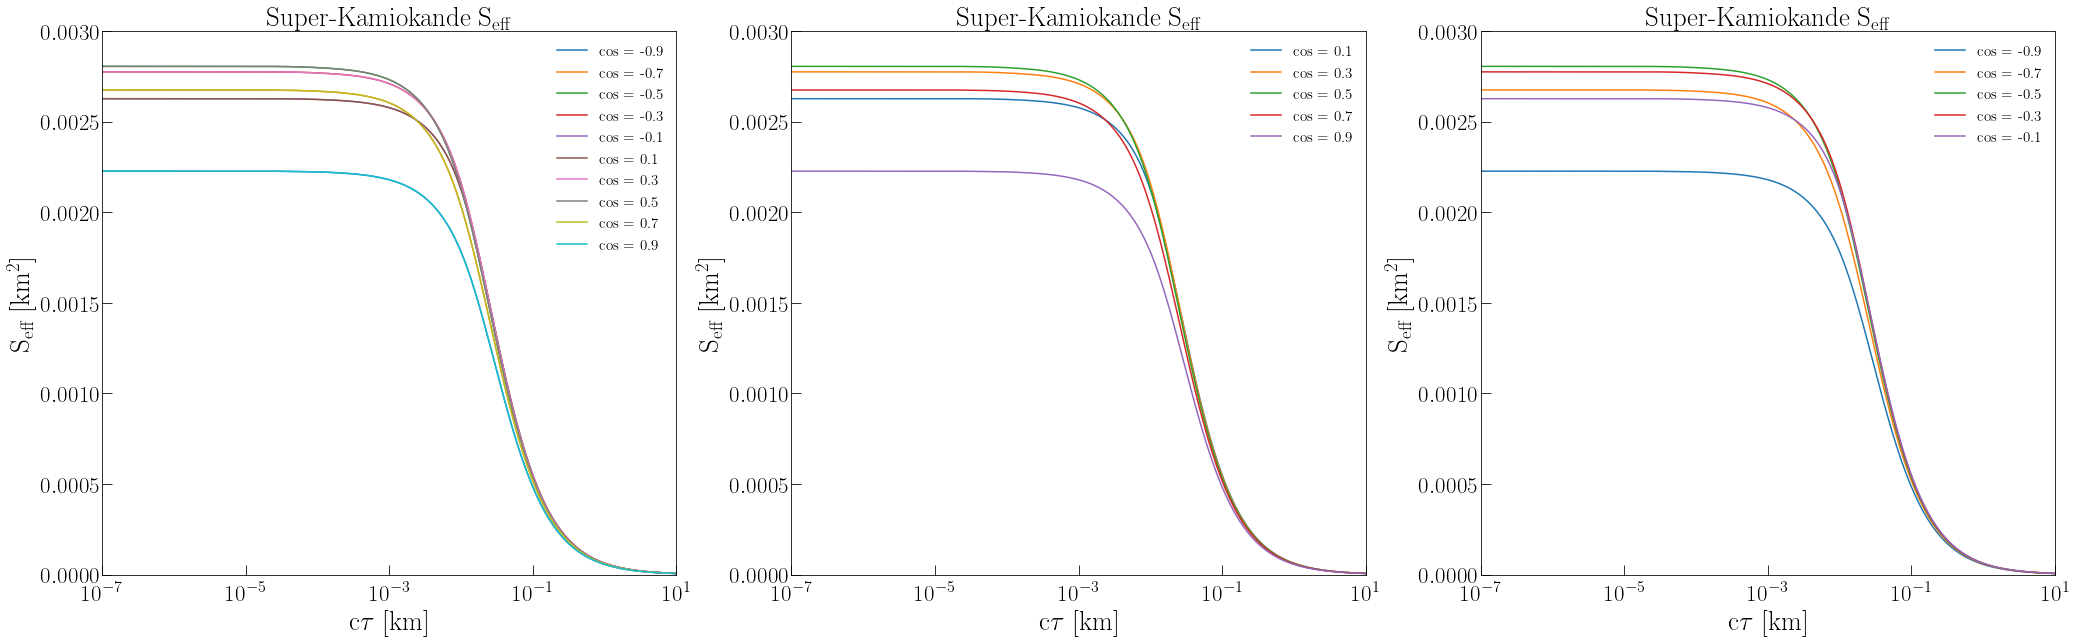

In [14]:
#df_Aeff = pd.read_csv(main_dir+'/datafiles/Aeff/expanded_surface_data_SK.txt', header=None, delim_whitespace=True, names = ['A_top','A_side','cos_theta','ctau','A_total'])
df_Aeff = pd.read_csv(main_dir+'/datafiles/Aeff/SK_Aeff.txt', header=None, delim_whitespace=True, names = ['A_top','A_side','cos_theta','ctau','A_total'])

def Aeff_interpolator(df):
    df_tmp = df.sort_values(by=['cos_theta', 'ctau'], ascending=True)
    x = np.array(df_tmp['ctau'].unique(), dtype='float64')
    y = np.array(df_tmp['cos_theta'].unique(), dtype='float64')
    z = np.array(df_tmp['A_total'].values, dtype='float64')
    Z = z.reshape(len(y), len(x))
    return RectBivariateSpline(y, x, Z, kx=1, ky=1)
Aeff = Aeff_interpolator(df_Aeff)

#--------- PLOTS Aeff --------------#
ctau_vec = np.unique(df_Aeff.ctau)
cos_theta_vec = np.unique(df_Aeff.cos_theta)
fig, ax = plt.subplots(1,3, figsize=(35,10))

for cos in cos_theta_vec:
    ax[0].plot(ctau_vec, Aeff(cos, ctau_vec)[0]/1e10, label='cos = ' + str(round(cos,1)))
    if cos>0.0:
        ax[1].plot(ctau_vec, Aeff(cos,ctau_vec)[0]/1e10, label='cos = ' + str(round(cos,1)))
    if cos<0.0:
        ax[2].plot(ctau_vec, Aeff(cos,ctau_vec)[0]/1e10, label='cos = ' + str(round(cos,1)))

for i in range(0,3):
    #ax[i].tick_params(axis='both', which='major', labelsize=14)
    ax[i].set_title('Super-Kamiokande '+ r'$\mathrm{ S_{eff} }$', fontsize=27)
    ax[i].set_xlabel(r'$\mathrm{c \tau\;[km]}$')
    ax[i].set_ylabel(r'$\mathrm{S_{eff}\;[km^2]}$')
    ax[i].set_xscale('log')
    ax[i].set_xlim([1e-7,1e1])
    ax[i].set_ylim([0,0.003])
    ax[i].legend(fontsize=15)
    
    
#save plot    
plt.savefig(main_dir+'/plots/Aeff_cos_ctau.png')
plt.show()


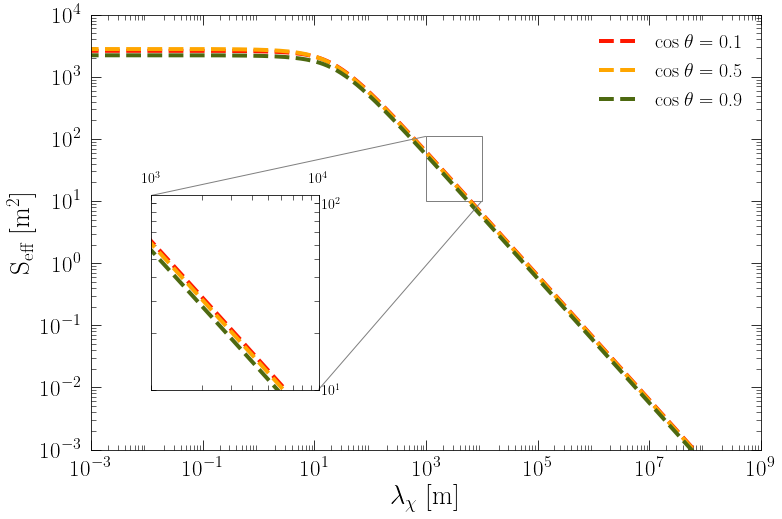

In [16]:
df_Aeff = pd.read_csv(main_dir+'/datafiles/Aeff/SK_Aeff.txt', header=None, delim_whitespace=True, names = ['A_top','A_side','cos_theta','ctau','A_total'])
def Aeff_interpolator(df):
    df_tmp = df.sort_values(by=['cos_theta', 'ctau'], ascending=True)
    x = np.array(df_tmp['ctau'].unique(), dtype='float64')
    y = np.array(df_tmp['cos_theta'].unique(), dtype='float64')
    z = np.array(df_tmp['A_total'].values, dtype='float64')
    Z = z.reshape(len(y), len(x))
    return RectBivariateSpline(y, x, Z, kx=1, ky=1)
Aeff = Aeff_interpolator(df_Aeff)

#--------- PLOTS Aeff --------------#
ctau_vec = np.unique(df_Aeff.ctau)
cos_theta_vec = np.unique(df_Aeff.cos_theta)
fig, ax = plt.subplots(figsize=(12,8))

cos1 = 0.1
cos2 = 0.9
cos3 = 0.5
ax.plot(ctau_vec*1e3, Aeff(cos1, ctau_vec )[0]/1e4, linestyle='dashed', linewidth = 4.0 ,color='#ff1700', label=r'$\mathrm{cos\:\theta =}$ ' + str(round(cos1,1)))
ax.plot(ctau_vec*1e3, Aeff(cos3, ctau_vec )[0]/1e4, linestyle='dashed', linewidth = 4.0 ,color='#ffa600', label=r'$\mathrm{cos\:\theta =}$ ' + str(round(cos3,1)))
ax.plot(ctau_vec*1e3, Aeff(cos2, ctau_vec )[0]/1e4, linestyle='dashed', linewidth = 4.0 ,color='#4d6910', label=r'$\mathrm{cos\:\theta =}$ ' + str(round(cos2,1)))

#----------------------------------#
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-3,1e4])
ax.set_xlim([1e-3,1e9])

#----------------------------------#
#ticks
ax.set_xlabel(r'$\mathrm{\lambda_{\chi}\;[m]}$',  fontsize=27)
ax.set_ylabel(r'$\mathrm{S_{eff}\;[m^2]}$', fontsize=27)

locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * 1, numticks=1000)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * 1, numticks=1000)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.tick_params(axis='both', which='major', right=True, top=True, labelsize = 23, direction = 'in', length = 10, pad = 10)
ax.tick_params(axis='both', which='minor', right=True, top=True, labelsize = 23, direction = 'in', length = 5)

#legend
ax.legend(fontsize=20, frameon=False)
#----------------------------------------------#
# Make the zoom-in plot:
x1, x2 = 1e3, 1e4
y1, y2 = 1e1, 1.1e2
axins = zoomed_inset_axes(ax, 3, loc = 3 , borderpad = 3.0)
axins.yaxis.tick_right()
axins.xaxis.tick_top()

axins.plot(ctau_vec*1e3, Aeff(cos1, ctau_vec )[0]/1e4, color='#ff1700',  linestyle='dashed', linewidth = 4.0 )
axins.plot(ctau_vec*1e3, Aeff(cos3, ctau_vec )[0]/1e4, color='#ffa600',  linestyle='dashed', linewidth = 4.0 )
axins.plot(ctau_vec*1e3, Aeff(cos2, ctau_vec )[0]/1e4, color='#4d6910',  linestyle='dashed', linewidth = 4.0 )

axins.set_xscale('log')
axins.set_yscale('log')

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec = "0.5")
axins.tick_params(axis ='both', which ='both', labelsize = 14, direction = 'in', left = True, bottom = True, length = 5)
plt.draw()

#----------------------------------------------#
#save plot
plt.savefig(main_dir+'/plots/Aeff_cos01_cos09.pdf')
plt.show()


## 4. Bounds

### 4.1 D-Mesons BM1 Lam121 = Lam112

In [4]:
path=main_dir+'/datafiles/SK_data/'

CO_multiring_nue,EV_multiring_nue= np.transpose(np.array(pd.read_csv(path+r'\multiring_multigev_nue.csv',names=['A','AA'] )))
CO_multiring_nuebar,EV_multiring_nuebar= np.transpose(np.array(pd.read_csv(path+r'\multiring_multigev_nuebar.csv',names=['A','AA'] )))
CO_singlering_nue,EV_singlering_nue= np.transpose(np.array(pd.read_csv(path+r'\singlering_multigev_nue.csv',names=['A','AA'] )))
CO_singlering_nuebar,EV_singlering_nuebar= np.transpose(np.array(pd.read_csv(path+r'\singlering_multigev_nuebar.csv',names=['A','AA'] )))
xCO_multiring_nue_pre,EV_multiring_nue_pre= np.transpose(np.array(pd.read_csv(path+r'\multiring_multigev_nue_prediction.csv',names=['A','AA'] )))
CO_multiring_nuebar_pre,EV_multiring_nuebar_pre= np.transpose(np.array(pd.read_csv(path+r'\multiring_multigev_nuebar_prediction.csv',names=['A','AA'] )))
CO_singlering_nue_pre,EV_singlering_nue_pre= np.transpose(np.array(pd.read_csv(path+r'\singlering_multigev_nue_prediction.csv',names=['A','AA'] )))
CO_singlering_nuebar_pre,EV_singlering_nuebar_pre= np.transpose(np.array(pd.read_csv(path+r'\singlering_multigev_nuebar_prediction.csv',names=['A','AA'] )))

measured_PC=[]
for k, elements in enumerate(EV_singlering_nuebar):
    measured_PC.append(EV_singlering_nuebar[k]+EV_singlering_nue[k]+EV_multiring_nuebar[k]+EV_multiring_nue[k])

predicted_PC=[]
for k, elements in enumerate(EV_singlering_nuebar_pre):
    predicted_PC.append(EV_singlering_nuebar_pre[k]+EV_singlering_nue_pre[k]+EV_multiring_nuebar_pre[k]+EV_multiring_nue_pre[k])

Background=predicted_PC
Data=measured_PC

In [18]:
df = pd.read_csv(main_dir + '/datafiles/EventDistribution/NEVENTS_BM1_SYBILL.csv', index_col=0)
def Chi_sq_bin(s,b,d):
    #print(s,b,d,s + b -d + d*np.log(d/(s+b)))
    return s + b -d + d*np.log(d/(s+b))
    
data_final=[]
data_final_g=[]
for c, CTAU_N_REST in enumerate(df.ctau.unique()):
    df_TMP=df[df['ctau'] == CTAU_N_REST]
    mass_pt=df_TMP['m'].unique()
    lambda_pt=df_TMP['lam121'].unique()
    br_pt=df_TMP['Br'].unique()
    Signal_g_aux= df[df.ctau == CTAU_N_REST].nev.values
    suma_g=0
    for K, element in enumerate(Data):
        suma_g += Chi_sq_bin( Signal_g_aux[K], Background[K], Data[K])
    data_final_g.append([float(lambda_pt),float(br_pt),float(mass_pt),CTAU_N_REST,2*suma_g])

Caphi_0000,BR_0000,M_0000,CT_0000,CHI2_0000 = np.array(data_final_g).T
chi2_90CL_Nparam= 4.61
min_chi2=np.min(CHI2_0000)
max_chi2=np.max(CHI2_0000)
chi2=chi2_90CL_Nparam+min_chi2
X_0001, Y_0001, Z_0001 =chi2_pro.grid_val(M_0000,Caphi_0000,CHI2_0000)


In [19]:
df = pd.read_csv(main_dir + '/datafiles/EventDistribution/NEVENTS_BM1_DPMJET.csv', index_col=0)
def Chi_sq_bin(s,b,d):
    return s + b -d + d*np.log(d/(s+b))
    
data_final=[]
data_final_g=[]
for c, CTAU_N_REST in enumerate(df.ctau.unique()):
    df_TMP=df[df['ctau'] == CTAU_N_REST]
    mass_pt=df_TMP['m'].unique()
    lambda_pt=df_TMP['lam121'].unique()
    br_pt=df_TMP['Br'].unique()
    Signal_g_aux= df[df.ctau == CTAU_N_REST].nev.values
    suma_g=0
    for K, element in enumerate(Data):
        suma_g += Chi_sq_bin( Signal_g_aux[K], Background[K], Data[K])
    data_final_g.append([float(lambda_pt),float(br_pt),float(mass_pt),CTAU_N_REST,2*suma_g])

Caphi_0000_DPMJET,BR_0000_DPMJET,M_0000_DPMJET,CT_0000_DPMJET,CHI2_0000_DPMJET = np.array(data_final_g).T
chi2_90CL_Nparam_DPMJET= 4.61
min_chi2_DPMJET=np.min(CHI2_0000_DPMJET)
max_chi2_DPMJET=np.max(CHI2_0000_DPMJET)
chi2_DPMJET=chi2_90CL_Nparam_DPMJET+min_chi2_DPMJET
X_0001_DPMJET, Y_0001_DPMJET, Z_0001_DPMJET =chi2_pro.grid_val(M_0000_DPMJET,Caphi_0000_DPMJET,CHI2_0000_DPMJET)


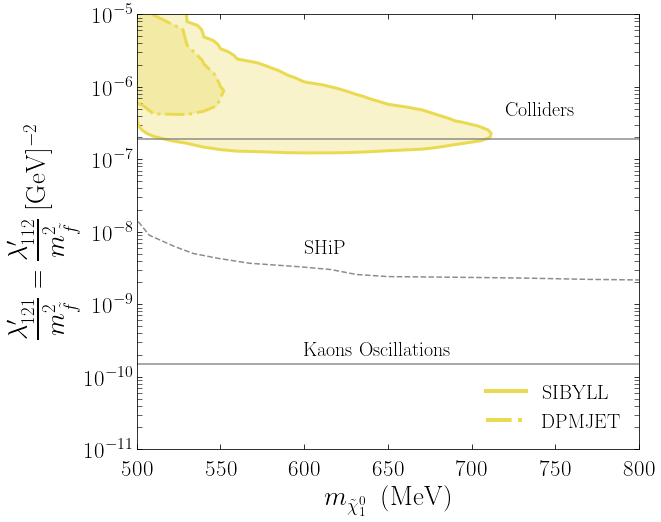

In [20]:
# BOUNDS
df_SHIP = pd.read_csv(main_dir+f"/others/B1_SHIP.txt", header=None, delim_whitespace=True, names = ['m', 'lambda'])
bound_kaons = np.sqrt(2.2)*1e-10# *1000**2
bound_collider1 = 1.9e-7
#--------------------------------------------------------------------------------------------------------------------#
fig, ax = plt.subplots(figsize=(9,8))

CP = ax.contour(X_0001*1000,Y_0001/1000**2, Z_0001, levels=[chi2], colors='#eada52',linestyles='-' )
CPF= ax.contourf(X_0001*1000,Y_0001/1000**2, Z_0001, levels=[chi2,max_chi2], colors='#eada52', alpha=0.3)
ax.get_children()[0].set_linewidths(3.0)

CP2 = ax.contour(X_0001_DPMJET*1000,Y_0001_DPMJET/1000**2,Z_0001_DPMJET, levels=[chi2], colors='#eada52', linestyles='-.')
CPF2= ax.contourf(X_0001_DPMJET*1000,Y_0001_DPMJET/1000**2,Z_0001_DPMJET, levels=[chi2,max_chi2],colors='#eada52', alpha=0.3)
ax.get_children()[2].set_linewidths(3.0)

#--------------------------------------------------------------------------------------------------------------------#
#CP_maish = plt.contour(X_0001_maish,Y_0001_maish,Z_0001_maish, levels=[chi2_maish], colors='green',linestyles='-')
#CPF_maish = plt.contourf(X_0001_maish,Y_0001_maish,Z_0001_maish, levels=[chi2_maish,max_chi2_maish],colors='green',alpha=0.3)

#--------------------------------------------------------------------------------------------------------------------#
#bounds
ax.axhline(bound_collider1, color = 'gray', alpha=0.9)
ax.axhline(bound_kaons, color = 'gray', alpha=0.9)
ax.plot(df_SHIP['m'], df_SHIP['lambda'], linestyle = 'dashed', color = 'gray', alpha=0.9)

#--------------------------------------------------------------------------------------------------------------------#
#legend
px=[0]
py=[0]
ax.plot(px,py,'-',color='#eada52',label='SIBYLL', linewidth = 4.0)
ax.plot(px,py,'-.',color='#eada52',label='DPMJET', linewidth = 4.0)

#------displaystylec--------------------------------------------------------------------------------------------------------------#
ax.set_yscale("log")
ax.set_ylabel(r'$\dfrac{\lambda^\prime_{121}}{m_{\tilde{f}}^2}=\dfrac{\lambda^\prime_{112}}{m_{\tilde{f}}^2} \; $[GeV]$^{-2}$', fontsize=27)
ax.set_xlabel(r'$m_{\tilde{\chi}^0_1} \,\,\,$'+'(MeV)', fontsize=27)
ax.tick_params(axis ='both', which ='both', labelsize = 23, direction = 'in', right = True, top = True, length = 5)

#--------------------------------------------------------------------------------------------------------------------#
plt.annotate('Colliders', xy=(720,4e-7), size=20)
plt.annotate('SHiP', xy=(600,5e-9), size=20)
plt.annotate('Kaons Oscillations', xy=(600, 2e-10), size=20)

#plt.annotate('SIBYLL', xy=(0.6, 1e-6), size=20, rotation=-12)
#plt.annotate('DPMJET', xy=(0.53, 7.5e-7), size=20, rotation=-50)

#--------------------------------------------------------------------------------------------------------------------#
ax.set_xlim([500, 800])
ax.set_ylim([1e-11, 1e-5])
ax.legend(fontsize=20, frameon=False, loc='lower right')
plt.savefig(main_dir+'/plots/Dmeson_bound_BM1.pdf')
plt.show()

### 4.1 D-Mesons BM2 Lam121 

In [28]:
df = pd.read_csv(main_dir + '/datafiles/EventDistribution/NEVENTS_BM2_SYBILL.csv', index_col=0)
def Chi_sq_bin(s,b,d):
    return s + b -d + d*np.log(d/(s+b))
    
data_final=[]
data_final_g=[]
for c, CTAU_N_REST in enumerate(df.ctau.unique()):
    df_TMP=df[df['ctau'] == CTAU_N_REST]
    mass_pt=df_TMP['m'].unique()
    lambda_pt=df_TMP['lam121'].unique()
    br_pt=df_TMP['Br'].unique()
    Signal_g_aux= df[df.ctau == CTAU_N_REST].nev.values
    suma_g=0
    for K, element in enumerate(Data):
        suma_g += Chi_sq_bin( Signal_g_aux[K], Background[K], Data[K])
    data_final_g.append([float(lambda_pt),float(br_pt),float(mass_pt),CTAU_N_REST,2*suma_g])

Caphi_0000_bm4,BR_0000_bm4,M_0000_bm4,CT_0000_bm4,CHI2_0000_bm4 = np.array(data_final_g).T
chi2_90CL_Nparam_bm4= 4.61
min_chi2_bm4=np.min(CHI2_0000_bm4)
max_chi2_bm4=np.max(CHI2_0000_bm4)
chi2_bm4=chi2_90CL_Nparam_bm4+min_chi2_bm4
X_0001_bm4, Y_0001_bm4, Z_0001_bm4 =chi2_pro.grid_val(M_0000_bm4,Caphi_0000_bm4,CHI2_0000_bm4)


In [29]:
df = pd.read_csv(main_dir + '/datafiles/EventDistribution/NEVENTS_BM2_DPMJET.csv', index_col=0)
def Chi_sq_bin(s,b,d):
    return s + b -d + d*np.log(d/(s+b))
    
data_final=[]
data_final_g=[]
for c, CTAU_N_REST in enumerate(df.ctau.unique()):
    df_TMP=df[df['ctau'] == CTAU_N_REST]
    mass_pt=df_TMP['m'].unique()
    lambda_pt=df_TMP['lam121'].unique()
    br_pt=df_TMP['Br'].unique()
    Signal_g_aux= df[df.ctau == CTAU_N_REST].nev.values
    suma_g=0
    for K, element in enumerate(Data):
        suma_g += Chi_sq_bin( Signal_g_aux[K], Background[K], Data[K])
    data_final_g.append([float(lambda_pt),float(br_pt),float(mass_pt),CTAU_N_REST,2*suma_g])

Caphi_0000_bm4_DPMJET,BR_0000_bm4_DPMJET,M_0000_bm4_DPMJET,CT_0000_bm4_DPMJET,CHI2_0000_bm4_DPMJET = np.array(data_final_g).T
chi2_90CL_Nparam_bm4_DPMJET= 4.61
min_chi2_bm4_DPMJET=np.min(CHI2_0000_bm4_DPMJET)
max_chi2_bm4_DPMJET=np.max(CHI2_0000_bm4_DPMJET)
chi2_bm4_DPMJET=chi2_90CL_Nparam_bm4_DPMJET+min_chi2_bm4_DPMJET
X_0001_bm4_DPMJET, Y_0001_bm4_DPMJET, Z_0001_bm4_DPMJET =chi2_pro.grid_val(M_0000_bm4_DPMJET,Caphi_0000_bm4_DPMJET,CHI2_0000_bm4_DPMJET)


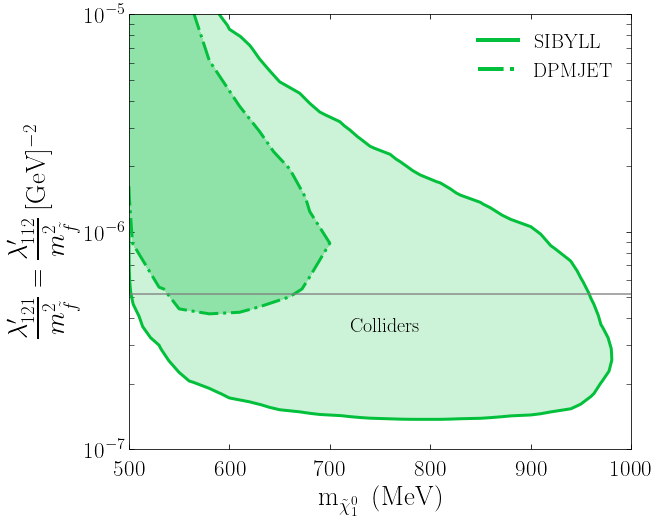

In [30]:
# BOUNDS
df_SHIP = pd.read_csv(main_dir+f"/others/B1_SHIP.txt", header=None, delim_whitespace=True, names = ['m', 'lambda'])
bound_kaons = np.sqrt(2.2)*1e-10# *1000**2
#bound_collider2 = 4.3e-7
bound_collider2 = 5.2e-7


#--------------------------------------------------------------------------------------------------------------------#
fig, ax = plt.subplots(figsize=(9,8))

CP = ax.contour(X_0001_bm4*1000,Y_0001_bm4/1000**2, Z_0001_bm4, levels=[chi2_bm4], colors='#03c03c',linestyles='-' )
CPF= ax.contourf(X_0001_bm4*1000,Y_0001_bm4/1000**2, Z_0001_bm4, levels=[chi2_bm4,max_chi2_bm4], colors='#03c03c', alpha=0.2)
ax.get_children()[0].set_linewidths(3.0)

CP2 = ax.contour(X_0001_bm4_DPMJET*1000,Y_0001_bm4_DPMJET/1000**2,Z_0001_bm4_DPMJET, levels=[chi2_bm4_DPMJET], colors='#03c03c', linestyles='-.')
CPF2= ax.contourf(X_0001_bm4_DPMJET*1000,Y_0001_bm4_DPMJET/1000**2,Z_0001_bm4_DPMJET, levels=[chi2_bm4_DPMJET,max_chi2_bm4_DPMJET],colors='#03c03c', alpha=0.3)
ax.get_children()[2].set_linewidths(3.0)

#--------------------------------------------------------------------------------------------------------------------#
#bounds
ax.axhline(bound_collider2, color = 'gray', alpha=0.9)



#--------------------------------------------------------------------------------------------------------------------#
#legend
px=[0]
py=[0]
ax.plot(px,py,'-',color='#03c03c',label='SIBYLL', linewidth = 4.0)
ax.plot(px,py,'-.',color='#03c03c',label='DPMJET', linewidth = 4.0)


#--------------------------------------------------------------------------------------------------------------------#
ax.set_yscale("log")
ax.set_ylabel(r'$  \dfrac{\lambda^\prime_{121}}{m_{\tilde{f}}^2}= \dfrac{\lambda^\prime_{112}}{m_{\tilde{f}}^2}  \: $[GeV]$^{-2}$', fontsize=27)
ax.set_xlabel(r'm$_{\tilde{\chi}^0_1} \,\,\,$'+'(MeV)', fontsize=27)
ax.tick_params(axis ='both', which ='both', labelsize = 23, direction = 'in', right = True, top = True, length = 5)

#--------------------------------------------------------------------------------------------------------------------#

plt.annotate('Colliders', xy=(720,3.5e-7), size=20)
#plt.annotate('SIBYLL', xy=(700, 3e-6), size=20, rotation=-25)
#plt.annotate('DPMJET', xy=(610, 2.2e-6), size=20, rotation=-50)

#--------------------------------------------------------------------------------------------------------------------#

ax.set_xlim([500, 1000])
ax.set_ylim([1e-7, 1e-5])
ax.legend(fontsize=20, frameon=False)
#plt.savefig(main_dir+'/plots/Dmeson_bound_BM1.pdf')
plt.show()


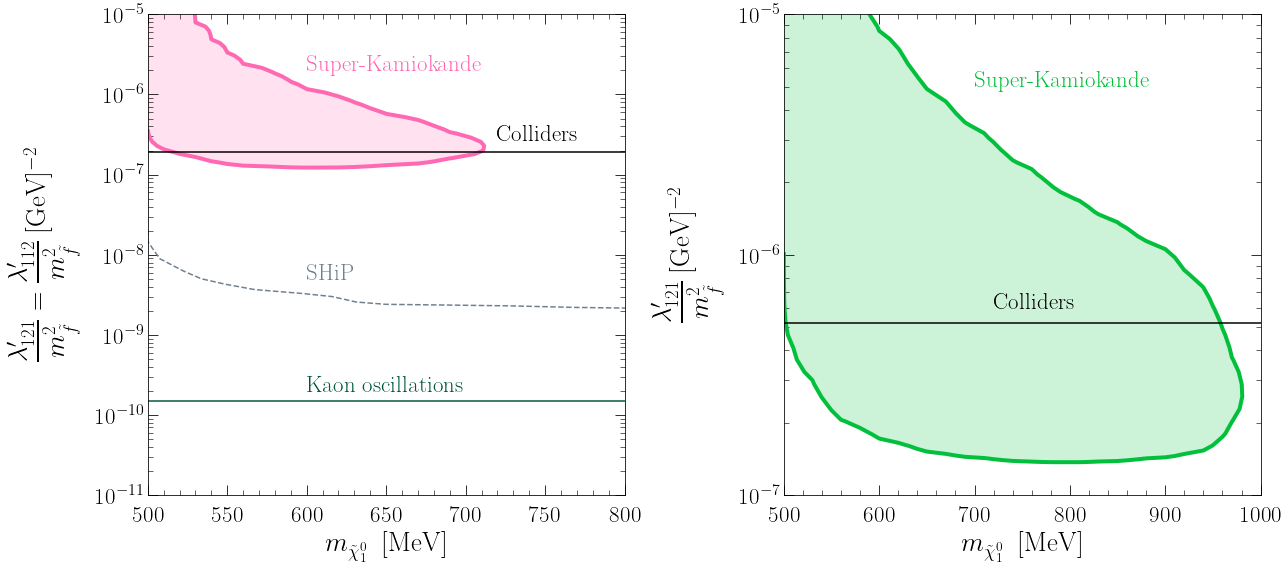

In [31]:
# side-by-side plot
fig,ax = plt.subplots(1,2,figsize=(18,8) )


#----------------------------- left plot -------------------------------------#

CP = ax[0].contour(X_0001*1000,Y_0001/1000**2, Z_0001, levels=[chi2], colors='hotpink',linestyles='-' )#'#eada52'
CPF= ax[0].contourf(X_0001*1000,Y_0001/1000**2, Z_0001, levels=[chi2,max_chi2], colors='hotpink', alpha=0.2)
ax[0].get_children()[0].set_linewidths(4.0)

#CP2 = ax[0].contour(X_0001_DPMJET*1000,Y_0001_DPMJET/1000**2,Z_0001_DPMJET, levels=[chi2], colors='#eada52', linestyles='-.')
#CPF2= ax[0].contourf(X_0001_DPMJET*1000,Y_0001_DPMJET/1000**2,Z_0001_DPMJET, levels=[chi2,max_chi2],colors='#eada52', alpha=0.3)
#ax[0].get_children()[2].set_linewidths(4.0)

#bounds
ax[0].axhline(bound_collider1, color = 'k')#, alpha=0.9)
ax[0].axhline(bound_kaons, color = '#005740')#, alpha=0.9)
ax[0].plot(df_SHIP['m'], df_SHIP['lambda'], linestyle = 'dashed', color = 'slategray')#, alpha=0.9)

#text
ax[0].annotate('Colliders', xy=(720,2.7e-7), size=23)
ax[0].annotate('SHiP', xy=(600,5e-9), size=23, color = 'slategray')
ax[0].annotate('Kaon oscillations', xy=(600, 2e-10), color = '#005740', size=23)
ax[0].annotate('Super-Kamiokande', xy=(600, 2e-6),  color='hotpink', size=23, weight= 'bold')


#legend
#px=[0]
#py=[0]
#ax[0].plot(px,py,'-',color='#eada52',label='Super-Kamiokande', linewidth = 3.0)
#ax[0].plot(px,py,linestyle='dashdot',color='#eada52',label='DPMJET', linewidth = 3.0)

#limits
ax[0].set_xlim([500, 800])
ax[0].set_ylim([1e-11, 1e-5])
#ax[0].legend(fontsize=20, frameon=False, loc='lower right')

#----------------------------- right plot -------------------------------------#
CP = ax[1].contour(X_0001_bm4*1000,Y_0001_bm4/1000**2, Z_0001_bm4, levels=[chi2_bm4], colors='#03c03c',linestyles='-' )
CPF= ax[1].contourf(X_0001_bm4*1000,Y_0001_bm4/1000**2, Z_0001_bm4, levels=[chi2_bm4,max_chi2_bm4], colors='#03c03c', alpha=0.2)
ax[1].get_children()[0].set_linewidths(4.0)

#CP2 = ax[1].contour(X_0001_bm4_DPMJET*1000,Y_0001_bm4_DPMJET/1000**2,Z_0001_bm4_DPMJET, levels=[chi2_bm4_DPMJET], colors='#03c03c', linestyles='-.')
#CPF2= ax[1].contourf(X_0001_bm4_DPMJET*1000,Y_0001_bm4_DPMJET/1000**2,Z_0001_bm4_DPMJET, levels=[chi2_bm4_DPMJET,max_chi2_bm4_DPMJET],colors='#03c03c', alpha=0.3)
#ax[1].get_children()[2].set_linewidths(4.0)

#bounds
ax[1].axhline(bound_collider2, color = 'k')#, alpha=0.9)

#text
#ax[1].annotate('Charged Current Universality', xy=(600,5e-7), size=23)
ax[1].annotate('Colliders', xy=(720,6e-7), size=23)
ax[1].annotate('Super-Kamiokande', xy=(700,5e-6), weight= 'bold',color ='#03c03c' , size=23)



#legend
#px=[0]
#py=[0]
#line1, = ax[1].plot(px,py,'-',color='#03c03c',label='Super-Kamiokande', linewidth = 3.0)
#line2, = ax[1].plot(px,py,linestyle='dashdot',color='#03c03c',label='DPMJET', linewidth = 3.0)

#limits
ax[1].set_xlim([500, 1000])
ax[1].set_ylim([1e-7, 1e-5])
#ax[1].legend(fontsize=20, frameon=False)
#--------------------------------------------------------------------------------------------------------------------#
ax[0].set_ylabel(r'$\dfrac{\lambda^\prime_{121}}{m_{\tilde{f}}^2}= \dfrac{\lambda^\prime_{112}}{m_{\tilde{f}}^2}  \: $[GeV]$^{-2}$', fontsize=27, labelpad = 15)
ax[1].set_ylabel(r'$\dfrac{\lambda^\prime_{121}}{m_{\tilde{f}}^2} \: $[GeV]$^{-2}$', fontsize=27, labelpad = 15)

for i in range(2):
    ax[i].set_yscale("log")
    ax[i].set_xlabel(r'$m_{\tilde{\chi}^0_1} \,\,\,$'+'[MeV]', fontsize=27)
    ax[i].tick_params(axis ='both', which ='both', labelsize = 23, direction = 'in', right = True, top = True)
    ax[i].tick_params(axis='both', which='major', length = 10)
    ax[i].tick_params(axis='both', which='minor', length = 5)
ax[0].xaxis.set_minor_locator(MultipleLocator(10))
ax[1].xaxis.set_minor_locator(MultipleLocator(20))


fig.tight_layout()
plt.savefig(main_dir+'/plots/Dmeson_bounds.pdf',  bbox_inches="tight")
plt.show()

### 4.2 Kaons BM3 Lam111 = Lam112

In [6]:
df = pd.read_csv(main_dir + '/datafiles/EventDistribution/NEVENTS_BM3_SYBILL.csv', index_col=0)
def Chi_sq_bin(s,b,d):
    return s + b -d + d*np.log(d/(s+b))
    
data_final=[]
data_final_g=[]
for c, CTAU_N_REST in enumerate(df.ctau.unique()):
    df_TMP=df[df['ctau'] == CTAU_N_REST]
    mass_pt=df_TMP['m'].unique()
    lambda_pt=df_TMP['lam111'].unique()
    br_pt=df_TMP['Br'].unique()
    Signal_g_aux= df[df.ctau == CTAU_N_REST].nev.values
    suma_g=0
    for K, element in enumerate(Data):
        suma_g += Chi_sq_bin( Signal_g_aux[K], Background[K], Data[K])
    data_final_g.append([float(lambda_pt),float(br_pt),float(mass_pt),CTAU_N_REST,2*suma_g])

Caphi_0000,BR_0000,M_0000,CT_0000,CHI2_0000 = np.array(data_final_g).T
chi2_90CL_Nparam= 15.99
min_chi2=np.min(CHI2_0000)
max_chi2=np.max(CHI2_0000)
chi2=chi2_90CL_Nparam+min_chi2
X_0001, Y_0001, Z_0001 =chi2_pro.grid_val(M_0000,Caphi_0000,CHI2_0000)


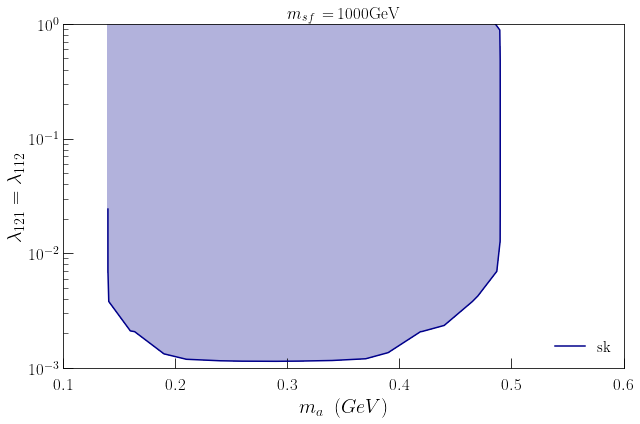

In [7]:
fig, ax = plt.subplots(figsize=(9,6))
CP = plt.contour(X_0001,Y_0001,Z_0001, levels=[chi2], colors='darkblue',linestyles='-')
CPF= plt.contourf(X_0001,Y_0001,Z_0001, levels=[chi2,max_chi2],colors='darkblue',alpha=0.3)

px=[0]
py=[0]
plt.plot(px,py,'-',color='darkblue',label='sk')
plt.yscale("log")
plt.ylabel(r'$  \lambda_{121}=\lambda_{112}$', fontdict={'size': 20})
plt.xlabel(r'$ m_{a} \,\,\,(GeV)$', fontdict={'size': 20})
MN=1000
plt.title(r'$ m_{sf}\,=\,$'+str(MN)+'GeV', fontsize=17)
plt.legend(loc='lower right',fontsize=15,frameon=False)
plt.xlim([0.1, 0.6])
plt.ylim([1e-3, 1e0])

plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
plt.tight_layout()
#save plot
plt.savefig(main_dir+'/plots/Kaon_bound_BM2.pdf')
plt.show()
